# Bank Classification Dataset

### About Dataset

#### There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.

### Data Set Information:

#### The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.


#### Problem Statement:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [1]:
#importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
import sklearn.metrics as metrics

In [6]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [7]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [8]:
#Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [9]:
df=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Machine Learning 2\\Sem_preparation\\Banking Dataset Classification\\new_train.csv')
df.head()#first 5 reords

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [10]:
df.tail()#last 5 records

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,999,0,nonexistent,no


In [11]:
df.shape

(32950, 16)

In [12]:
#there are 32950 records and 16 columns

In [13]:
#Explore the types of variables (continuous, categorical etc.)

In [14]:
df.info()#summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [15]:
df_num=df.select_dtypes(include=np.number)
len(df_num.columns)#numerical columns

5

In [16]:
#there are 5 numerical variables

In [17]:
df_num.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [18]:
df_cat=df.select_dtypes(include='object')
len(df_cat.columns)#categorical columns

11

In [19]:
#there are 11 categorical variables

In [20]:
df_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [21]:
#Calculate five point summary for numerical variables. 
#Summarize observations for categorical variables – no. of categories, % observations in each category.

In [22]:
df.describe()#5 point summary

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [23]:
#Inferences:

In [24]:
#for the age column maximum age is 98 , minimium age is 17 and average age is 40
#for the duration column maximum duration is 4918 and average age is 258

In [25]:
for i in df.columns:
    print('% observations in each category for the column',i,)
    print(df[i].value_counts()*100/len(df))
    print()

% observations in each category for the column age
31    4.707132
32    4.473445
33    4.379363
35    4.300455
34    4.261002
        ...   
17    0.009105
89    0.006070
91    0.003035
87    0.003035
98    0.003035
Name: age, Length: 75, dtype: float64

% observations in each category for the column job
admin.           25.232170
blue-collar      22.582701
technician       16.388467
services          9.699545
management        7.116844
retired           4.145675
entrepreneur      3.520486
self-employed     3.335357
housemaid         2.594841
unemployed        2.421851
student           2.157815
unknown           0.804249
Name: job, dtype: float64

% observations in each category for the column marital
married     60.555387
single      28.094082
divorced    11.153263
unknown      0.197269
Name: marital, dtype: float64

% observations in each category for the column education
university.degree      29.547800
high.school            23.053111
basic.9y               14.646434
professional.

In [26]:
#Check for defects in the data. Perform necessary actions to ‘fix’ these defects.

In [27]:
#checking for missing values

In [28]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [29]:
#there are no missing values present

In [30]:
#checking for outliers

Box plot for the column age :


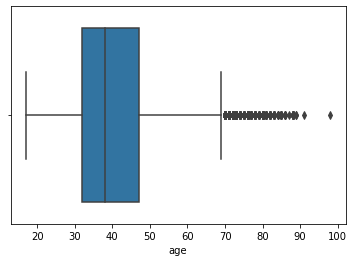

Box plot for the column duration :


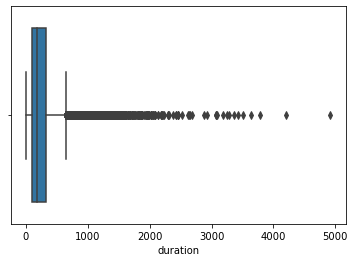

Box plot for the column campaign :


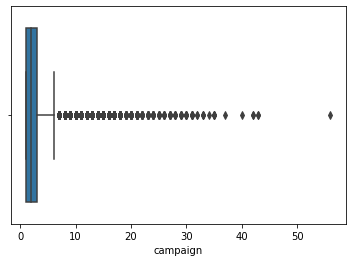

Box plot for the column pdays :


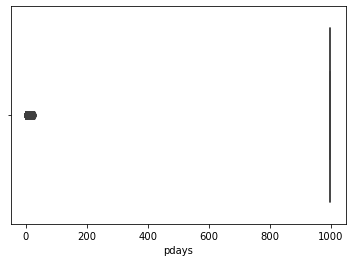

Box plot for the column previous :


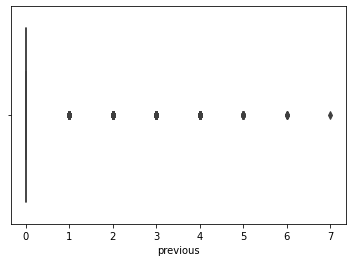

In [31]:
for i in df_num.columns:
    print('Box plot for the column', i,':')
    sns.boxplot(df[i])
    plt.show()

In [32]:
#for modelling we will go ahead with the outliers

In [33]:
#fixing target variable (for plotting purposes)

In [34]:
df['y'].value_counts()

no     29238
yes     3712
Name: y, dtype: int64

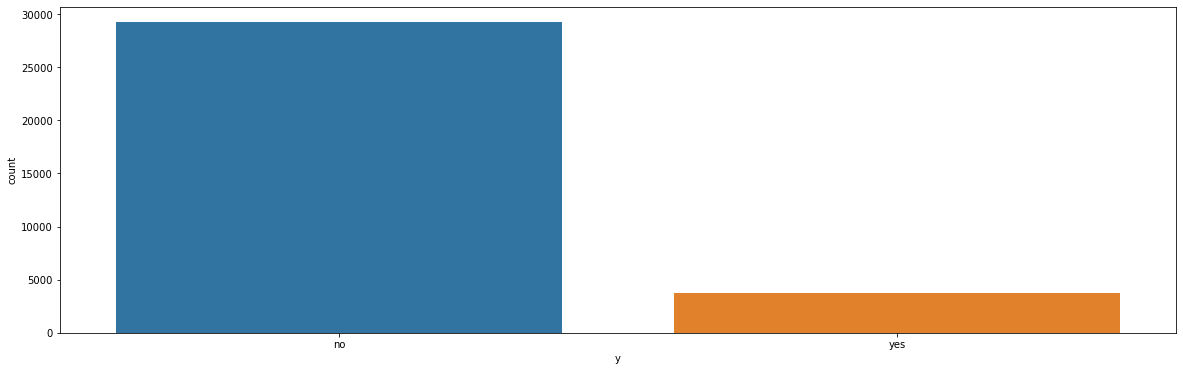

In [35]:
plt.figure(figsize=(20,6))
sns.countplot(df['y'])
plt.show()

In [36]:
df['y'].replace('yes',1,inplace=True)
df['y'].replace('no',0,inplace=True)

In [37]:
df.head()#checking

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,0
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,0
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,1
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,0
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,0


In [38]:
#Plot relevant categorical plots. 
#Find out which are the variables most correlated or appear to be in causation with Target? 
#Do you want to exclude some variables from the model based on this analysis? What other actions will you take?

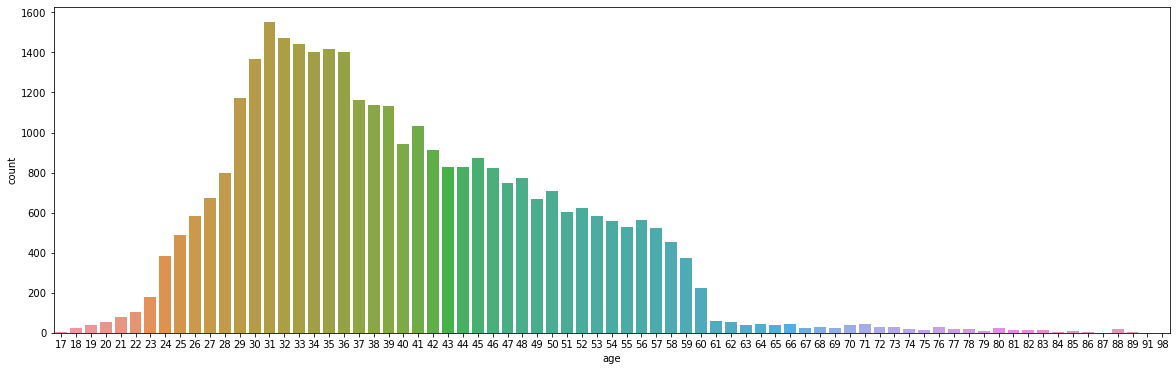

In [39]:
plt.figure(figsize=(20,6))
sns.countplot(df['age'])
plt.show()

In [40]:
#Age is more dominat in the range of 30 to 40

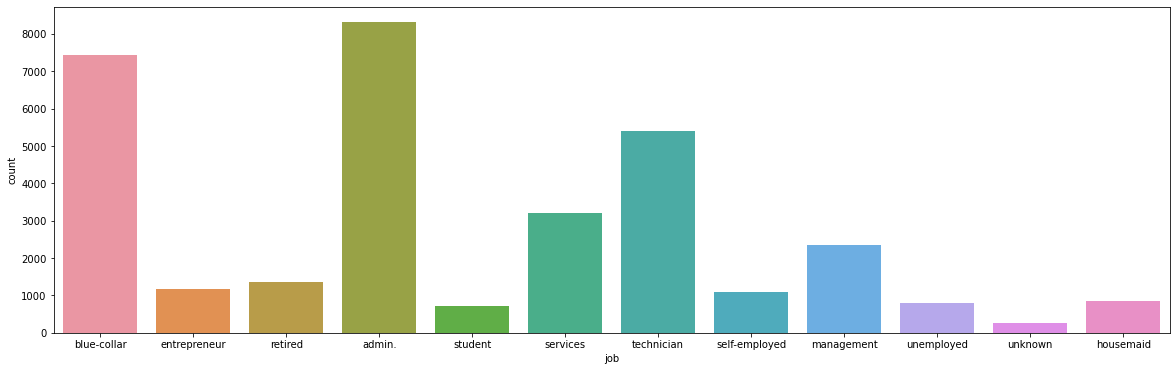

In [41]:
plt.figure(figsize=(20,6))
sns.countplot(df['job'])
plt.show()

In [42]:
#blue-collar and admin jobs are higher with respect to the others

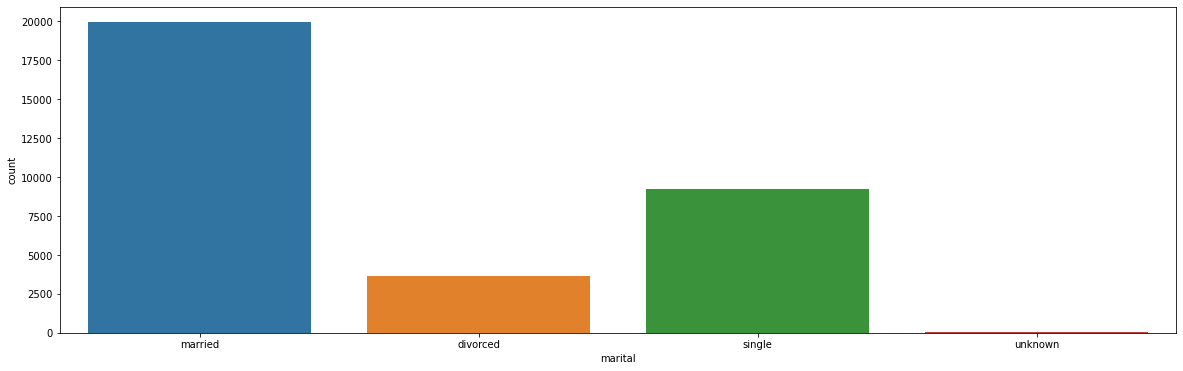

In [43]:
plt.figure(figsize=(20,6))
sns.countplot(df['marital'])
plt.show()

In [44]:
#In the marital status , mostly people are married

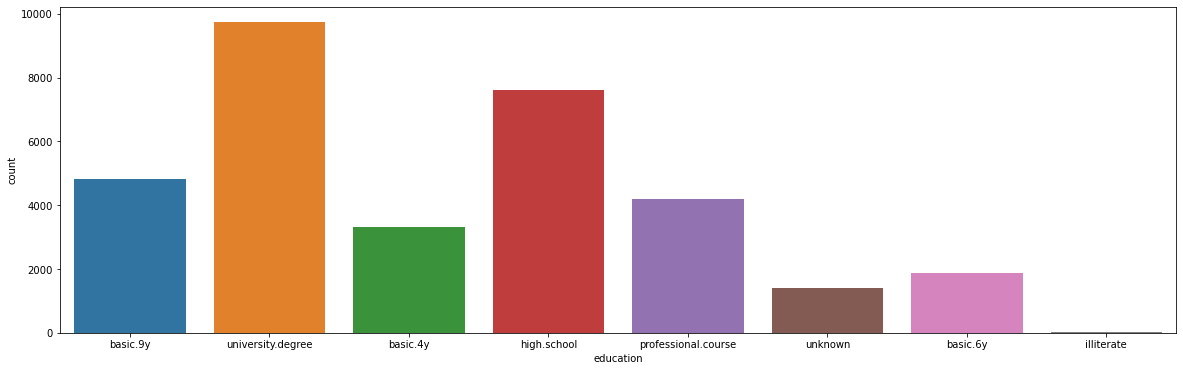

In [45]:
plt.figure(figsize=(20,6))
sns.countplot(df['education'])
plt.show()

In [46]:
#Most people posses the universty degree while the least are still illiearte

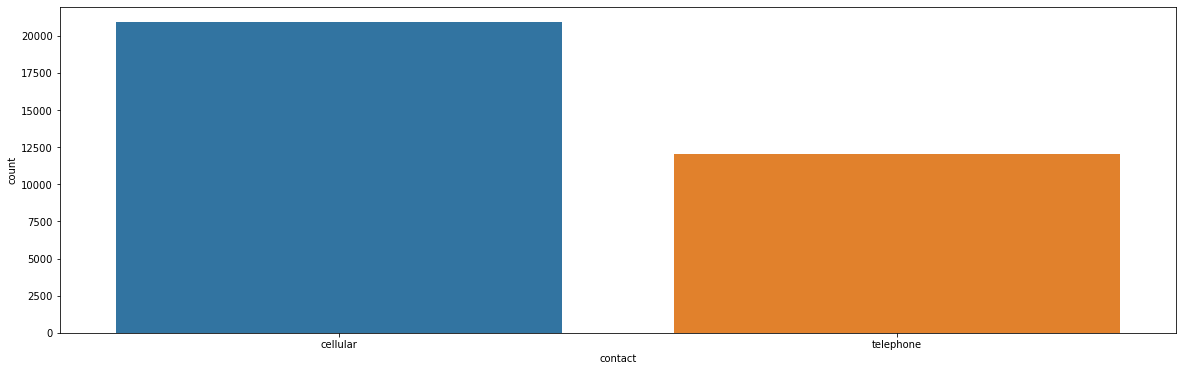

In [47]:
plt.figure(figsize=(20,6))
sns.countplot(df['contact'])
plt.show()

In [48]:
#Most people has their cellular number registered

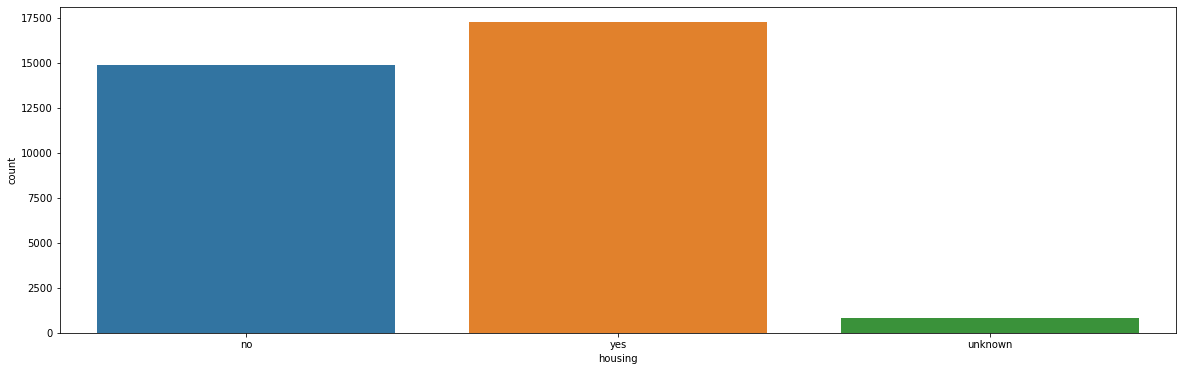

In [49]:
plt.figure(figsize=(20,6))
sns.countplot(df['housing'])
plt.show()

In [50]:
#many people posses housing loan

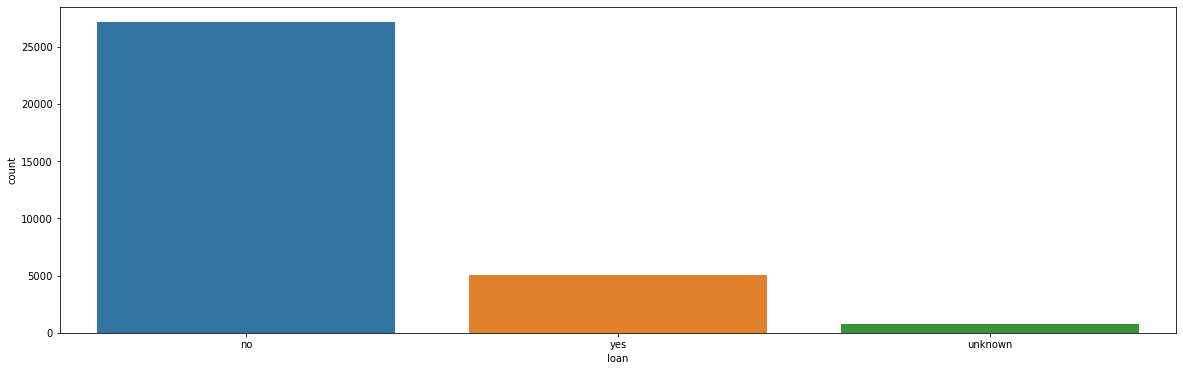

In [51]:
plt.figure(figsize=(20,6))
sns.countplot(df['loan'])
plt.show()

In [52]:
#the number of personal loan taken is less

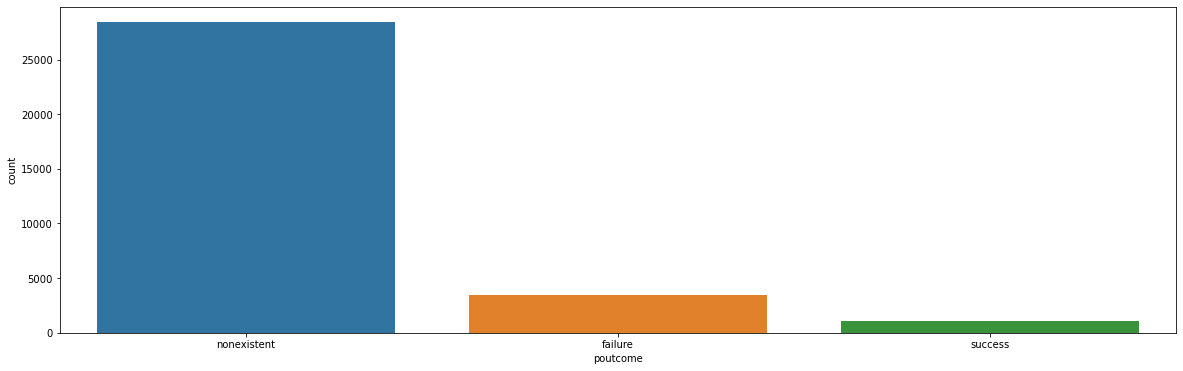

In [53]:
plt.figure(figsize=(20,6))
sns.countplot(df['poutcome'])
plt.show()

In [54]:
# Many people have not paricipated previous marketing campaign 

In [55]:
#Covariance plots

In [56]:
df.cov()

,age,duration,campaign,pdays,previous,y
age,108.235650,-4.959704,0.094550,-62.594415,0.107310,0.094316
duration,-4.959704,67068.525802,-53.931365,-2293.888468,2.912658,32.814345
campaign,0.094550,-53.931365,7.575297,27.828214,-0.108574,-0.056966
pdays,-62.594415,-2293.888468,27.828214,35325.614449,-55.300001,-19.345369
previous,0.107310,2.912658,-0.108574,-55.300001,0.249025,0.036251
y,0.094316,32.814345,-0.056966,-19.345369,0.036251,0.099967


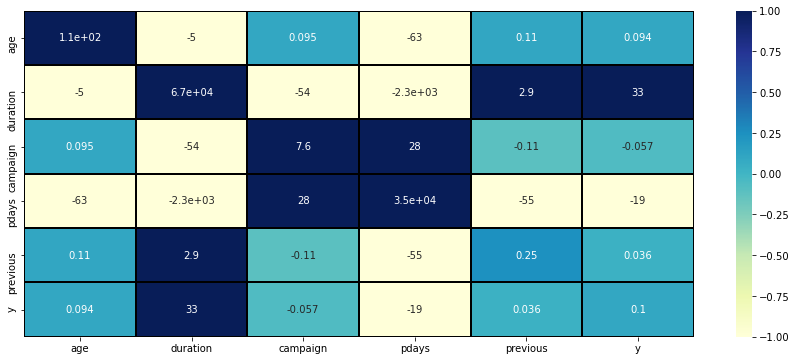

In [57]:
plt.figure(figsize=(15,6))
sns.heatmap(df.cov(),vmin=-1,vmax=1,annot=True,linewidths=1,linecolor='black',cmap="YlGnBu")
plt.show()

In [58]:
#corealtion plot

In [59]:
df.corr()

,age,duration,campaign,pdays,previous,y
age,1.000000,-0.001841,0.003302,-0.032011,0.020670,0.028673
duration,-0.001841,1.000000,-0.075663,-0.047127,0.022538,0.400752
campaign,0.003302,-0.075663,1.000000,0.053795,-0.079051,-0.065462
pdays,-0.032011,-0.047127,0.053795,1.000000,-0.589601,-0.325539
previous,0.020670,0.022538,-0.079051,-0.589601,1.000000,0.229759
y,0.028673,0.400752,-0.065462,-0.325539,0.229759,1.000000


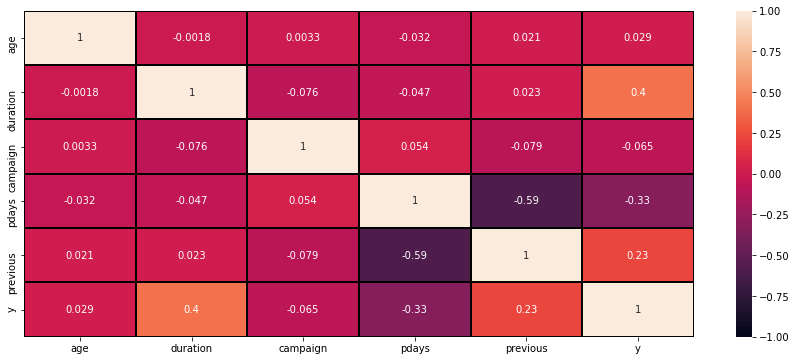

In [60]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,linewidths=1,linecolor='black')
plt.show()

In [61]:
#inferences:

#Duration and taget variable y has a good positve corelation 0.4
#previous and taget variable y has a positve corelation of 0.23
#pdays and taget variable y has a neagative corelation of -0.33

In [62]:
#Going ahead we will bee keeping all the variables for modelling purposes

In [63]:
#Plot all independent variables with the target & find out the relationship? 
#Perform the Relevant Tests to find out if the Independent variables are associated with the Target Variable.

In [64]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,0
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,0
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,1
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,0
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,0


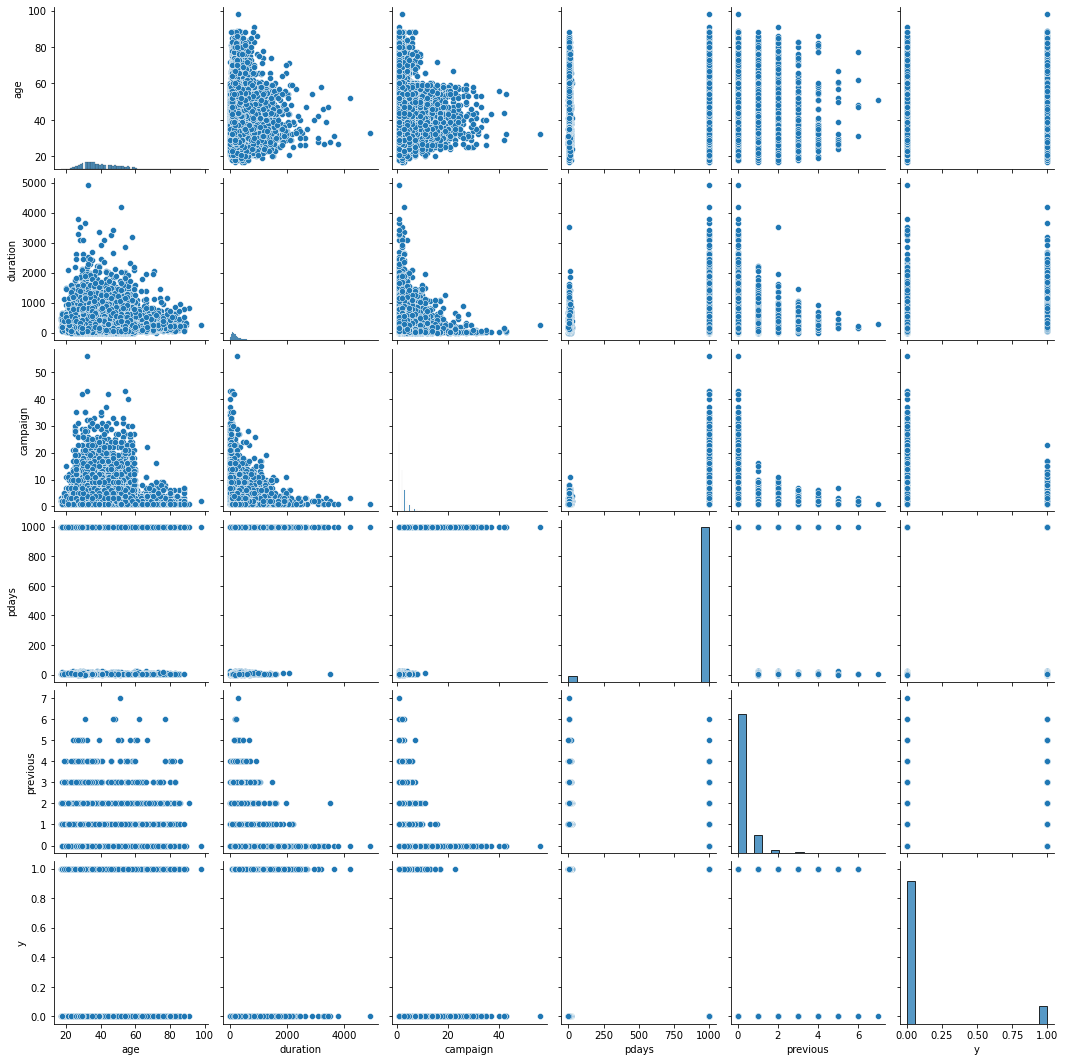

In [65]:
sns.pairplot(df)
plt.show()
#pairplot

In [66]:
#plt.figure(figsize=(15,6))
#sns.swarmplot(data=df,x='job',y='marital',hue='y',palette='Set2')
#plt.show()

In [67]:
#Split dataset into train and test (70:30).
#Are both train and test representative of the overall data? How would you ascertain this statistically?

In [68]:
#Data preprocesing before splitting

In [69]:
df1=df.copy()#making copy of the original dataframe

In [70]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,0
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,0
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,1
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,0
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,0


In [71]:
Ind_vari=df1.drop('y',axis=1)
Ind_vari.head()#independent variables

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent


In [72]:
Y=df1['y']#dependent variables

In [73]:
#encoding

In [74]:
Label_encoder=LabelEncoder()

In [75]:
Ind_vari['job']=Label_encoder.fit_transform(Ind_vari['job'])
Ind_vari['marital']=Label_encoder.fit_transform(Ind_vari['marital'])
Ind_vari['education']=Label_encoder.fit_transform(Ind_vari['education'])
Ind_vari['housing']=Label_encoder.fit_transform(Ind_vari['housing'])
Ind_vari['loan']=Label_encoder.fit_transform(Ind_vari['loan'])
Ind_vari['contact']=Label_encoder.fit_transform(Ind_vari['contact'])
Ind_vari['month']=Label_encoder.fit_transform(Ind_vari['month'])
Ind_vari['day_of_week']=Label_encoder.fit_transform(Ind_vari['day_of_week'])
Ind_vari['poutcome']=Label_encoder.fit_transform(Ind_vari['poutcome'])
Ind_vari['default']=Label_encoder.fit_transform(Ind_vari['default'])

In [76]:
Ind_vari.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,49,1,1,2,1,0,0,0,7,4,227,4,999,0,1
1,37,2,1,6,0,0,0,1,7,4,202,2,999,1,0
2,78,5,1,0,0,0,0,0,3,1,1148,1,999,0,1
3,36,0,1,6,0,2,0,1,6,1,120,2,999,0,1
4,59,5,0,6,0,0,0,0,4,3,368,2,999,0,1


In [77]:
#Scaling

In [78]:
standard_scaler=StandardScaler()
Ind_vari_new=standard_scaler.fit_transform(Ind_vari)
X=pd.DataFrame(Ind_vari_new,columns=Ind_vari.columns)

In [79]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,0.863739,-0.757779,-0.284871,-0.818379,1.933816,-1.08747,-0.453839,-0.758915,1.192670,1.427938,-0.120196,0.522981,0.196584,-0.350127,0.193670
1,-0.289722,-0.479529,-0.284871,1.053452,-0.516547,-1.08747,-0.453839,1.317671,1.192670,1.427938,-0.216732,-0.203688,0.196584,1.653813,-2.552217
2,3.651268,0.355224,-0.284871,-1.754295,-0.516547,-1.08747,-0.453839,-0.758915,-0.531722,-0.714554,3.436173,-0.567023,0.196584,-0.350127,0.193670
3,-0.385843,-1.036030,-0.284871,1.053452,-0.516547,0.94245,-0.453839,1.317671,0.761572,-0.714554,-0.533368,-0.203688,0.196584,-0.350127,0.193670
4,1.824956,0.355224,-1.928167,1.053452,-0.516547,-1.08747,-0.453839,-0.758915,-0.100624,0.713774,0.424264,-0.203688,0.196584,-0.350127,0.193670


In [80]:
Y.value_counts()

0    29238
1     3712
Name: y, dtype: int64

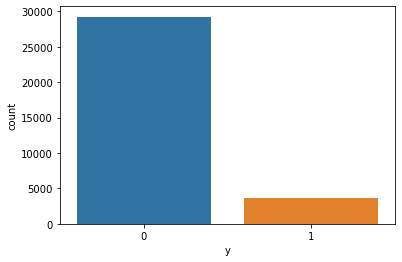

In [81]:
sns.countplot(Y)
plt.show()

In [82]:
#As data is imbalanced we will perform SMOTE Analysis

In [83]:
from imblearn.over_sampling import SMOTE

In [84]:
sm=SMOTE(random_state=2)
X1,Y1= sm.fit_resample(X,Y)
Y1.value_counts()

0    29238
1    29238
Name: y, dtype: int64

In [85]:
#Now Data is balaced

In [86]:
#Performing Train_test_split

In [87]:
x_train,x_test, y_train , y_test = train_test_split(X1, Y1, test_size=0.3, random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40933, 15)
(17543, 15)
(40933,)
(17543,)


In [88]:
#Build the base model and explain the reason of selecting that model.
#What is the overall accuracy?Also comment whether it is good or bad.

In [89]:
#1. KNeighborsClassifier

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
knc=KNeighborsClassifier()
KNeighbors_Classifier=knc.fit(x_train,y_train)

In [92]:
knc_pred=KNeighbors_Classifier.predict(x_test)

In [93]:
print(classification_report(knc_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      7446
           1       0.99      0.85      0.91     10097

    accuracy                           0.91     17543
   macro avg       0.91      0.92      0.91     17543
weighted avg       0.92      0.91      0.91     17543



In [94]:
confusion_matrix(knc_pred,y_test)

array([[7332,  114],
       [1502, 8595]], dtype=int64)

In [95]:
accuracy_score(knc_pred,y_test)*100

90.78834862908283

In [96]:
##Inference:

#Accuracy of the model is 90

#Precison of the model is high amlost 0.91

#TPR(true positive rate) ie, Recall is also high 0.92

In [97]:
#ROC curve

In [98]:
fpr1,tpr1,threshold1=metrics.roc_curve(knc_pred,y_test)
roc_auc1=metrics.auc(fpr1,tpr1)

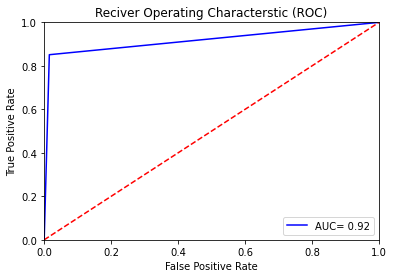

In [99]:
plt.title('Reciver Operating Characterstic (ROC)')
plt.plot(fpr1,tpr1,'b',label='AUC= %0.2f' %roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [100]:
#Interpretation: 
#The red dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#From the above plot, we can see that our classifier (KNeighborsClassifier) is away from the red dotted line; 
#with the AUC score 0.92.

In [101]:
#Check if the model is overfitting

In [102]:
knc_pred_train=KNeighbors_Classifier.predict(x_train)

In [103]:
print(classification_report(knc_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     17902
           1       1.00      0.89      0.94     23031

    accuracy                           0.93     40933
   macro avg       0.93      0.94      0.93     40933
weighted avg       0.94      0.93      0.93     40933



In [104]:
confusion_matrix(knc_pred_train,y_train)

array([[17800,   102],
       [ 2604, 20427]], dtype=int64)

In [105]:
accuracy_score(knc_pred_train,y_train)*100

93.38919698043144

In [106]:
#There is little overfitting in the model 

In [107]:
#Tune the Hyperparameters using GridSearchCV (KNeighborsClassifier)

In [108]:
tuning_parameters_1={'n_neighbors' : range(2,9),
                    'metric': ['euclidean','manhattan']}

In [109]:
knc1=KNeighborsClassifier()

knc_grid=GridSearchCV(estimator=knc1,param_grid=tuning_parameters_1,cv=3,scoring='accuracy')

knc_grid.fit(x_train,y_train)

print('Best parameters for KNeighborsClassifier: ', knc_grid.best_params_, '\n')

Best parameters for KNeighborsClassifier:  {'metric': 'manhattan', 'n_neighbors': 2} 



In [110]:
knc2=KNeighborsClassifier(n_neighbors=2,metric='manhattan')
KNeighbors_Classifier2=knc2.fit(x_train,y_train)

In [111]:
knc_pred2=KNeighbors_Classifier2.predict(x_test)

In [112]:
print(classification_report(knc_pred2,y_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      8539
           1       0.96      0.93      0.95      9004

    accuracy                           0.95     17543
   macro avg       0.95      0.95      0.95     17543
weighted avg       0.95      0.95      0.95     17543



In [113]:
confusion_matrix(knc_pred2,y_test)

array([[8219,  320],
       [ 615, 8389]], dtype=int64)

In [114]:
accuracy_score(knc_pred2,y_test)*100

94.67023884170325

In [115]:
#After GridSearchCV on KNeighborsClassifier there was no changes in the number of n_neighbors

In [116]:
#2. Decision Tree Classifier

In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
dtc=DecisionTreeClassifier()
Decision_Tree_Classifier=dtc.fit(x_train,y_train)

In [119]:
dtc_pred=Decision_Tree_Classifier.predict(x_test)

In [120]:
print(classification_report(dtc_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      8756
           1       0.92      0.91      0.91      8787

    accuracy                           0.91     17543
   macro avg       0.91      0.91      0.91     17543
weighted avg       0.91      0.91      0.91     17543



In [121]:
confusion_matrix(dtc_pred,y_test)

array([[8019,  737],
       [ 815, 7972]], dtype=int64)

In [122]:
accuracy_score(dtc_pred,y_test)

0.9115316650515876

In [123]:
##Inference:

#Accuracy of the model is 91

#Precison of the model is high amlost 0.91

#TPR(true positive rate) ie, Recall is also high 0.91

In [124]:
#ROC curve

In [125]:
fpr2,tpr2,threshold2=metrics.roc_curve(dtc_pred,y_test)
roc_auc2=metrics.auc(fpr2,tpr2)

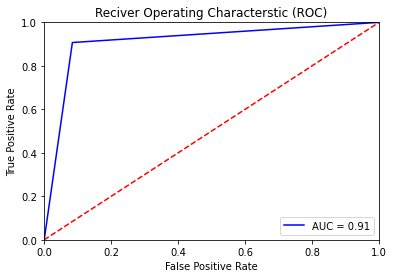

In [126]:
plt.title('Reciver Operating Characterstic (ROC)')
plt.plot(fpr2,tpr2,'b',label='AUC = %0.2f' %roc_auc2)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [127]:
#Interpretation: 
#The red dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#From the above plot, we can see that our classifier (DecisionTreeClassifier) is away from the red dotted line; 
#with the AUC score 0.91.

In [128]:
#To check if the model is overfitted or not

In [129]:
dtc_pred_tain=Decision_Tree_Classifier.predict(x_train)

In [130]:
print(classification_report(dtc_pred_tain,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20404
           1       1.00      1.00      1.00     20529

    accuracy                           1.00     40933
   macro avg       1.00      1.00      1.00     40933
weighted avg       1.00      1.00      1.00     40933



In [131]:
confusion_matrix(dtc_pred_tain,y_train)

array([[20404,     0],
       [    0, 20529]], dtype=int64)

In [132]:
accuracy_score(dtc_pred_tain,y_train)

1.0

In [133]:
#There is overfitting in the model on train accuracy

In [134]:
#Tune the Hyperparameters using GridSearchCV (DecisionTreeClassifier)

In [135]:
tuning_parameters_2={'criterion':['gini', 'entropy'],
                     'max_depth': range(2,7),
                    'min_samples_split': range(2,7)}

In [136]:
dtc1=DecisionTreeClassifier()

dtc_grid=GridSearchCV(estimator=dtc1,param_grid=tuning_parameters_2,cv=3,scoring='accuracy')
dtc_grid.fit(x_train,y_train)
print('Best parameters for DecisionTreeClassifier: ', dtc_grid.best_params_ , '\n')

Best parameters for DecisionTreeClassifier:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2} 



In [137]:
dtc2=DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_split=5)
Decision_Tree_Classifier2=dtc2.fit(x_train,y_train)

In [138]:
dtc_pred2=Decision_Tree_Classifier2.predict(x_test)

In [139]:
print(classification_report(dtc_pred2,y_test))

              precision    recall  f1-score   support

           0       0.75      0.91      0.83      7312
           1       0.93      0.79      0.85     10231

    accuracy                           0.84     17543
   macro avg       0.84      0.85      0.84     17543
weighted avg       0.85      0.84      0.84     17543



In [140]:
confusion_matrix(dtc_pred2,y_test)

array([[6666,  646],
       [2168, 8063]], dtype=int64)

In [141]:
accuracy_score(dtc_pred2,y_test)*100

83.95941401128655

In [142]:
#checking if the overfitting has reduced

In [143]:
dtc_pred2_train=Decision_Tree_Classifier2.predict(x_train)

In [144]:
print(classification_report(dtc_pred2_train,y_train))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83     17127
           1       0.92      0.79      0.85     23806

    accuracy                           0.84     40933
   macro avg       0.84      0.85      0.84     40933
weighted avg       0.85      0.84      0.84     40933



In [145]:
confusion_matrix(dtc_pred2_train,y_train)

array([[15508,  1619],
       [ 4896, 18910]], dtype=int64)

In [146]:
accuracy_score(dtc_pred2_train,y_train)*100

84.08374661031442

In [147]:
#After GridSearchCV on DecisionTreeClassifier with the tunned parameters the Overfitting has reduced 

In [148]:
#Important features

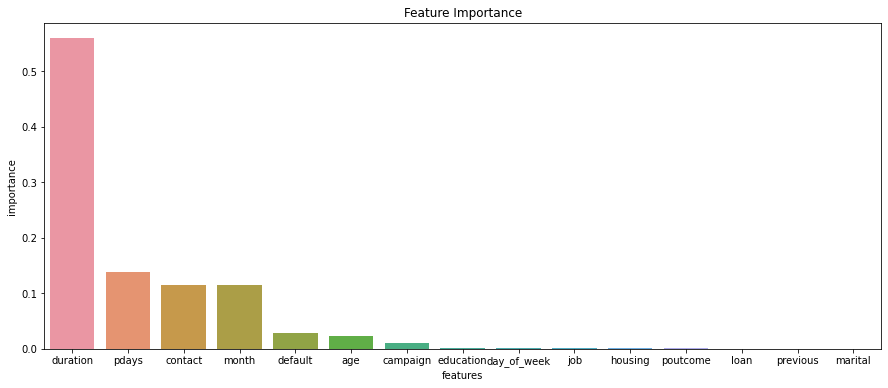

In [149]:
features_importance1=pd.DataFrame({'features':x_train.columns,
                                 'importance':Decision_Tree_Classifier2.feature_importances_})
features_importance1 = features_importance1.sort_values('importance', ascending = False)
plt.figure(figsize=(15,6))
sns.barplot(x='features',y='importance',data=features_importance1)
plt.title('Feature Importance')
plt.show()

In [150]:
#3.Random Forest Classifier

In [151]:
from sklearn.ensemble  import RandomForestClassifier

In [152]:
rfc=RandomForestClassifier()
Random_Forest_Classifier=rfc.fit(x_train,y_train)

In [153]:
rfc_pred=Random_Forest_Classifier.predict(x_test)

In [154]:
print(classification_report(rfc_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      8594
           1       0.97      0.94      0.95      8949

    accuracy                           0.95     17543
   macro avg       0.95      0.95      0.95     17543
weighted avg       0.95      0.95      0.95     17543



In [155]:
confusion_matrix(rfc_pred,y_test)

array([[8294,  300],
       [ 540, 8409]], dtype=int64)

In [156]:
accuracy_score(rfc_pred,y_test)*100

95.21176537650345

In [157]:
##Inference:

#Accuracy of the model is 95.19

#Precison of the model is high amlost 0.95

#TPR(true positive rate) ie, Recall is also high 0.95

In [158]:
#ROC curve

In [159]:
fpr3,tpr3,threshold3=metrics.roc_curve(rfc_pred,y_test)
roc_auc3=metrics.auc(fpr3,tpr3)

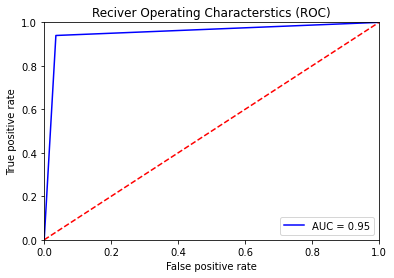

In [160]:
plt.title('Reciver Operating Characterstics (ROC)')
plt.plot(fpr3,tpr3,'b',label='AUC = %0.2f' %roc_auc3)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [161]:
#Interpretation: 
#The red dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#From the above plot, we can see that our classifier (RandomForestClassifier) is away from the red dotted line; 
#with the AUC score 0.95.

In [162]:
#to check if the model is overfitted 

In [163]:
rfc_pred_train=Random_Forest_Classifier.predict(x_train)

In [164]:
print(classification_report(rfc_pred_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20404
           1       1.00      1.00      1.00     20529

    accuracy                           1.00     40933
   macro avg       1.00      1.00      1.00     40933
weighted avg       1.00      1.00      1.00     40933



In [165]:
confusion_matrix(rfc_pred_train,y_train)

array([[20404,     0],
       [    0, 20529]], dtype=int64)

In [166]:
accuracy_score(rfc_pred_train,y_train)

1.0

In [167]:
#There is overfitting in the model on train accuracy

In [168]:
#Tune the Hyperparameters using GridSearchCV (RandomForestClassifier)

In [169]:
tunning_parameter_3={'n_estimators':[50,60,70,80,90,100],
                     'criterion':['gini','entropy'],
                     'max_depth': range(2,6)}

In [175]:
rfc1=RandomForestClassifier()
rfc_grid=GridSearchCV(estimator=rfc1,param_grid=tunning_parameter_3,cv=3,scoring='accuracy')
rfc_grid.fit(x_train,y_train)
print('Best parameters for RandomForestClassifier: ', rfc_grid.best_params_ , '\n')

Best parameters for RandomForestClassifier:  {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 60} 



In [170]:
rfc2=RandomForestClassifier(n_estimators=60,criterion='entropy',max_depth=5)
Random_Forest_Classifier2=rfc2.fit(x_train,y_train)

In [171]:
rfc_pred2=Random_Forest_Classifier2.predict(x_test)

In [172]:
print(classification_report(rfc_pred2,y_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      8137
           1       0.91      0.84      0.87      9406

    accuracy                           0.87     17543
   macro avg       0.87      0.87      0.87     17543
weighted avg       0.87      0.87      0.87     17543



In [173]:
confusion_matrix(rfc_pred2,y_test)

array([[7321,  816],
       [1513, 7893]], dtype=int64)

In [174]:
accuracy_score(rfc_pred2,y_test)

0.8672404947842445

In [175]:
#checking if the overfitting has reduced

In [176]:
rfc_pred2_train=Random_Forest_Classifier2.predict(x_train)

In [177]:
print(classification_report(rfc_pred2_train,y_train))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     18730
           1       0.90      0.84      0.87     22203

    accuracy                           0.86     40933
   macro avg       0.86      0.87      0.86     40933
weighted avg       0.87      0.86      0.86     40933



In [178]:
confusion_matrix(rfc_pred2_train,y_train)

array([[16776,  1954],
       [ 3628, 18575]], dtype=int64)

In [179]:
accuracy_score(rfc_pred2_train,y_train)

0.8636308113258251

In [180]:
#After GridSearchCV on RandomForestClassifier with the tunned parameters the Overfitting has reduced 

In [181]:
#Feature Importance

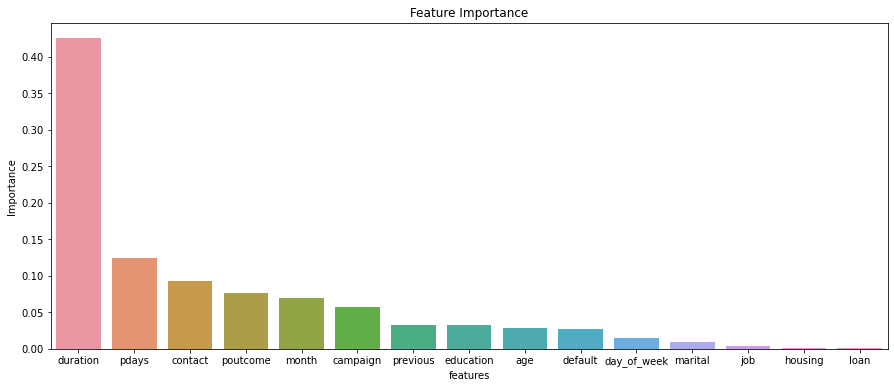

In [182]:
features_importance_2=pd.DataFrame({'features': x_train.columns,
                                   'Importance':Random_Forest_Classifier2.feature_importances_ })

features_importance_2=features_importance_2.sort_values(by='Importance',ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(x='features',y='Importance',data=features_importance_2)
plt.title('Feature Importance')
plt.show()

In [183]:
#4. Adaboost Classifier

In [184]:
from sklearn.ensemble import AdaBoostClassifier

In [185]:
ada=AdaBoostClassifier(n_estimators=40,random_state=2)
AdaBoost_classifier=ada.fit(x_train,y_train)

In [186]:
ada_pred=AdaBoost_classifier.predict(x_test)

In [187]:
print(classification_report(ada_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      8936
           1       0.89      0.90      0.89      8607

    accuracy                           0.90     17543
   macro avg       0.90      0.90      0.90     17543
weighted avg       0.90      0.90      0.90     17543



In [188]:
confusion_matrix(ada_pred,y_test)

array([[7966,  970],
       [ 868, 7739]], dtype=int64)

In [189]:
accuracy_score(ada_pred,y_test)*100

89.52288662144446

In [190]:
##Inference:

#Accuracy of the model is 89

#Precison of the model is high amlost 0.90

#TPR(true positive rate) ie, Recall is also high 0.90

In [191]:
fpr4,tpr4,threshold4=metrics.roc_curve(ada_pred,y_test)
roc_auc4=metrics.auc(fpr4,tpr4)

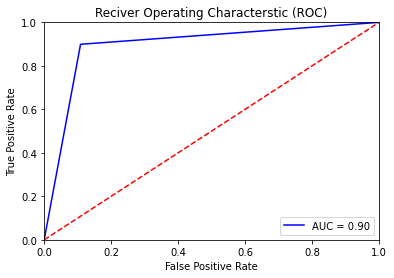

In [192]:
plt.title('Reciver Operating Characterstic (ROC)')
plt.plot(fpr4,tpr4,'b',label='AUC = %0.2f' %roc_auc4)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [193]:
#Interpretation: 
#The red dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#From the above plot, we can see that our classifier (RandomForestClassifier) is away from the red dotted line; 
#with the AUC score 0.90.

In [194]:
#To check if the model is overfitted or not

In [195]:
ada_pred_train=AdaBoost_classifier.predict(x_train)

In [196]:
print(classification_report(ada_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89     20565
           1       0.89      0.90      0.89     20368

    accuracy                           0.89     40933
   macro avg       0.89      0.89      0.89     40933
weighted avg       0.89      0.89      0.89     40933



In [197]:
confusion_matrix(ada_pred_train,y_train)

array([[18272,  2293],
       [ 2132, 18236]], dtype=int64)

In [198]:
accuracy_score(ada_pred_train,y_train)*100

89.1896513815259

In [199]:
#There is no overfiting

In [200]:
#Tune the Hyperparameters using GridSearchCV (AdaBoostClassifier)

In [201]:
tuning_parameters_4={'n_estimators':range(30,70)}

In [202]:
ada1=AdaBoostClassifier()
ada_grid=GridSearchCV(estimator=ada1,param_grid=tuning_parameters_4,cv=3,scoring='accuracy')
ada_grid.fit(x_train,y_train)
print('Best parameters for AdaBoostClassifier: ', ada_grid.best_params_ , '\n')

Best parameters for AdaBoostClassifier:  {'n_estimators': 68} 



In [203]:
ada2=AdaBoostClassifier(n_estimators=68,random_state=2)
AdaBoost_classifier2=ada2.fit(x_train,y_train)

In [204]:
ada_pred2=AdaBoost_classifier2.predict(x_test)

In [205]:
print(classification_report(ada_pred2,y_test))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      8964
           1       0.91      0.92      0.91      8579

    accuracy                           0.92     17543
   macro avg       0.92      0.92      0.92     17543
weighted avg       0.92      0.92      0.92     17543



In [206]:
confusion_matrix(ada_pred2,y_test)

array([[8155,  809],
       [ 679, 7900]], dtype=int64)

In [207]:
accuracy_score(ada_pred2,y_test)*100

91.51798438123468

In [208]:
#checking if the overfitting has reduced

In [209]:
ada_pred2_train=AdaBoost_classifier2.predict(x_train)

In [210]:
print(classification_report(ada_pred2_train,y_train))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     20764
           1       0.90      0.92      0.91     20169

    accuracy                           0.91     40933
   macro avg       0.91      0.91      0.91     40933
weighted avg       0.91      0.91      0.91     40933



In [211]:
confusion_matrix(ada_pred2_train,y_train)

array([[18770,  1994],
       [ 1634, 18535]], dtype=int64)

In [212]:
accuracy_score(ada_pred2_train,y_train)*100

91.13673564116972

In [213]:
#after Grid Search overftiing has reduced

In [214]:
#5. Gradient Boosting

In [215]:
from sklearn.ensemble import GradientBoostingClassifier

In [216]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)
GradientBoosting=gboost_model.fit(x_train, y_train)

In [217]:
gb_preds = GradientBoosting.predict(x_test)

In [218]:
print(classification_report(gb_preds,y_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      8766
           1       0.95      0.94      0.95      8777

    accuracy                           0.95     17543
   macro avg       0.95      0.95      0.95     17543
weighted avg       0.95      0.95      0.95     17543



In [219]:
confusion_matrix(gb_preds,y_test)

array([[8344,  422],
       [ 490, 8287]], dtype=int64)

In [220]:
accuracy_score(gb_preds,y_test)*100

94.80134526591803

In [221]:
##Inference:

#Accuracy of the model is 94

#Precison of the model is high amlost 0.95

#TPR(true positive rate) ie, Recall is also high 0.95

In [222]:
#ROC curve

In [223]:
fpr5,tpr5,threshold5=metrics.roc_curve(gb_preds,y_test)
roc_auc5=metrics.auc(fpr5,tpr5)

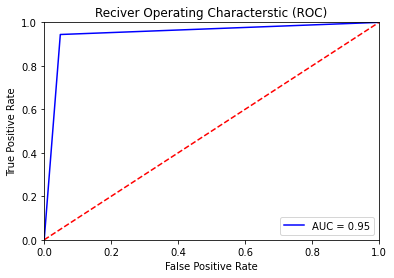

In [224]:
plt.title('Reciver Operating Characterstic (ROC)')
plt.plot(fpr5,tpr5,'b',label='AUC = %0.2f' %roc_auc5)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [225]:
#Interpretation: 
#The red dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#From the above plot, we can see that our classifier (RandomForestClassifier) is away from the red dotted line; 
#with the AUC score 0.95.

In [226]:
#To check if the model is overfitted or not

In [227]:
gb_preds_train=GradientBoosting.predict(x_train)

In [228]:
print(classification_report(gb_preds_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20477
           1       1.00      1.00      1.00     20456

    accuracy                           1.00     40933
   macro avg       1.00      1.00      1.00     40933
weighted avg       1.00      1.00      1.00     40933



In [229]:
confusion_matrix(gb_preds_train,y_train)

array([[20388,    89],
       [   16, 20440]], dtype=int64)

In [230]:
accuracy_score(gb_preds_train,y_train)*100

99.74348325312096

In [231]:
#Model is overfiting on train accuracy

In [232]:
#Tune the Hyperparameters using GridSearchCV (GradientBoostingClassifier)

In [235]:
tuning_parameters_5={'n_estimators':[140,150,160],
                    'max_depth':range(5,10)}

In [236]:
gboost_model1 = GradientBoostingClassifier()
gboost_grid=GridSearchCV(estimator=gboost_model1,param_grid=tuning_parameters_5,cv=3,scoring='accuracy')
gboost_grid.fit(x_train,y_train)
print('Best parameters for GradientBoostingClassifier: ', gboost_grid.best_params_ , '\n')

Best parameters for GradientBoostingClassifier:  {'max_depth': 9, 'n_estimators': 160} 



In [237]:
gboost_model2 = GradientBoostingClassifier(n_estimators = 160, max_depth = 9)
GradientBoosting2=gboost_model2.fit(x_train, y_train)

In [238]:
gb_preds2=GradientBoosting2.predict(x_test)

In [239]:
print(classification_report(gb_preds2,y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8788
           1       0.95      0.95      0.95      8755

    accuracy                           0.95     17543
   macro avg       0.95      0.95      0.95     17543
weighted avg       0.95      0.95      0.95     17543



In [240]:
confusion_matrix(gb_preds2,y_test)

array([[8362,  426],
       [ 472, 8283]], dtype=int64)

In [241]:
accuracy_score(gb_preds2,y_test)*100

94.88114917630965

In [242]:
#checking if the overfitting has reduced

In [243]:
gb_preds2_train=GradientBoosting2.predict(x_train)

In [244]:
print(classification_report(gb_preds2_train,y_train))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     20576
           1       0.99      1.00      0.99     20357

    accuracy                           0.99     40933
   macro avg       0.99      0.99      0.99     40933
weighted avg       0.99      0.99      0.99     40933



In [245]:
confusion_matrix(gb_preds2_train,y_train)

array([[20348,   228],
       [   56, 20301]], dtype=int64)

In [246]:
accuracy_score(gb_preds2_train,y_train)*100

99.30618327510811

In [247]:
#6.Stack Generalization

In [248]:
#Build the stacking classifier using the Random forest, KNN and Naive bayes as base learners 
#(consider the hyperparameters tuned using GridSearchCV in the previous sessions).

In [249]:
from sklearn.ensemble import StackingClassifier
# consider the various algorithms as base learners
base_learners = [('AdaBoost_model', AdaBoostClassifier(n_estimators=68,random_state=2)),
                 ('RandomForest_model', RandomForestClassifier(n_estimators=60,criterion='entropy',max_depth=5)),
                 ('GradientBoosting_model', GradientBoostingClassifier(n_estimators = 160, max_depth = 9, random_state = 10))]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GradientBoostingClassifier())

# fit the model on train dataset
StackingClass=stack_model.fit(x_train, y_train)

In [250]:
Sc_preds= StackingClass.predict(x_test)

In [251]:
print(classification_report(Sc_preds, y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      9033
           1       0.94      0.96      0.95      8510

    accuracy                           0.95     17543
   macro avg       0.95      0.95      0.95     17543
weighted avg       0.95      0.95      0.95     17543



In [252]:
confusion_matrix(Sc_preds, y_test)

array([[8480,  553],
       [ 354, 8156]], dtype=int64)

In [253]:
accuracy_score(Sc_preds, y_test)*100

94.82984666248646

In [ ]:
#------------------------------------END---------------------------------------------------------------------#